In [2]:
get_ipython().run_line_magic('matplotlib', 'inline') 
get_ipython().run_line_magic('reload_ext', 'autoreload') 
get_ipython().run_line_magic('autoreload', '2')

In [3]:
from fastai.structured import *
from fastai.column_data import *

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
PATH = '../../../data/ml-latest-small/'

In [23]:
ratings = pd.read_csv(f'{PATH}ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
movies = pd.read_csv(f'{PATH}movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
top_u = ratings.groupby('userId')['rating'].count()
top_u = top_u.sort_values(ascending=False)[:15]
top_m = ratings.groupby('movieId')['rating'].count()
top_m = top_m.sort_values(ascending=False)[:15]

top_r = ratings.join(top_u,on='userId',how='inner',rsuffix='_r')
top_r = top_r.join(top_m,on='movieId',how='inner',rsuffix='_r')

In [29]:
pd.crosstab(top_r.userId,top_r.movieId,top_r.rating,aggfunc=np.sum)

movieId,1,50,110,260,296,318,356,480,527,589,593,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,
68,2.5,3.0,2.5,5.0,2.0,3.0,3.5,3.5,4.0,3.5,3.5,5.0,4.5,5.0,2.5
182,4.0,4.5,3.5,3.5,5.0,4.5,5.0,3.5,4.0,2.0,4.5,3.0,5.0,5.0,5.0
249,4.0,4.0,5.0,5.0,4.0,4.5,4.5,4.0,4.5,4.0,4.0,5.0,5.0,4.5,5.0
274,4.0,4.0,4.5,3.0,5.0,4.5,4.5,3.5,4.0,4.5,4.0,4.5,4.0,5.0,5.0
288,4.5,NaN,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,4.5,3.0,NaN,3.5
307,4.0,4.5,3.5,3.5,4.5,4.5,4.0,3.5,4.5,2.5,4.5,3.0,3.5,4.0,4.0
380,5.0,4.0,4.0,5.0,5.0,3.0,5.0,5.0,NaN,5.0,5.0,5.0,4.5,NaN,4.0
387,NaN,4.5,3.5,4.5,5.0,3.5,4.0,3.0,NaN,3.5,4.0,4.5,4.0,4.5,4.5
414,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0


In [28]:
len(top_r)

211

### colab filtering with fastai

In [35]:
val_idxs = get_cv_idxs(len(ratings))
wd=2e-4
n_factors=50
bs=64

In [36]:
cf_data = CollabFilterDataset.from_data_frame(PATH,ratings,'userId','movieId','rating')

In [37]:
learn = cf_data.get_learner(n_factors,val_idxs,bs,opt_fn=optim.Adam)

 63%|██████▎   | 791/1261 [00:01<00:00, 495.51it/s, loss=1.26] 


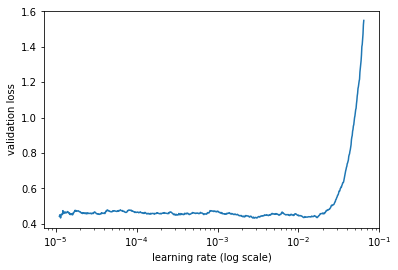

In [44]:
learn.lr_find()
learn.sched.plot()

In [45]:
lrs=1e-2

In [38]:
learn.fit(lrs,2,wds=wd,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss                                  
    0      0.765571   0.77499   
    1      0.715399   0.752278                                  
    2      0.591304   0.738589                                  



[array([0.73859])]

In [39]:
math.sqrt(0.738589)

0.8594120082940429

In [40]:
preds = learn.predict()

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


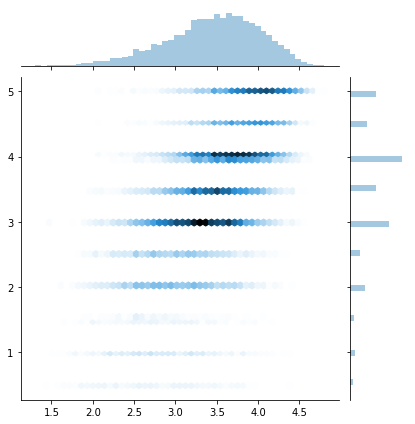

In [41]:
sns.jointplot(preds,learn.data.val_y,kind='hex')

### dot product example

#### simple

In [8]:
a = T([[1.,2],[3,4]])
b = T([[2.,2],[10,10]])
a, b

(
  1  2
  3  4
 [torch.cuda.FloatTensor of size 2x2 (GPU 0)], 
   2   2
  10  10
 [torch.cuda.FloatTensor of size 2x2 (GPU 0)])

In [9]:
a*b


  2   4
 30  40
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

In [10]:
(a*b).sum(1)


  6
 70
[torch.cuda.FloatTensor of size 2 (GPU 0)]

In [11]:
A = np.array([[1.,2],[3,4]])
B = np.array([[2.,2],[10,10]])

In [17]:
(A*B)

array([[ 2.,  4.],
       [30., 40.]])

In [31]:
np.dot(a,b)

array([[22., 22.],
       [46., 46.]], dtype=float32)

In [19]:
class DotProduct(nn.Module):
    def forward(self,u,m): return (u*m).sum(1)

In [20]:
model=DotProduct()

In [21]:
model(a,b)


  6
 70
[torch.cuda.FloatTensor of size 2 (GPU 0)]

In [22]:
A@B

array([[22., 22.],
       [46., 46.]])

#### complex

In [32]:
u_uniq = ratings.userId.unique()
user2idx = {o:i for i,o in enumerate(u_uniq)}
ratings.userId = ratings.userId.apply(lambda x: user2idx[x])

m_uniq = ratings.movieId.unique()
movie2idx = {o:i for i,o in enumerate(m_uniq)}
ratings.movieId = ratings.movieId.apply(lambda x: movie2idx[x])

n_users = len(u_uniq)
n_movies = len(m_uniq)

In [33]:
class EmbeddingDot(nn.Module):
    def __init__(self,n_users,n_movies):
        super().__init__()
        self.u = nn.Embedding(n_users,n_factors)
        self.m = nn.Embedding(n_movies,n_factors)
        self.u.weight.data.uniform_(0,0.05)
        self.u.weight.data.uniform_(0,0.05)
        
    def forward(self,cats,conts):
        user,movies=cats[:,0],cats[:,1]
        u,m = self.u(users),self.m(movies)
        return (u*m).sum(1)